In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 


In [2]:
# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])
 


In [3]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [5]:
 
# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)
 


Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]


In [6]:
print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")



Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


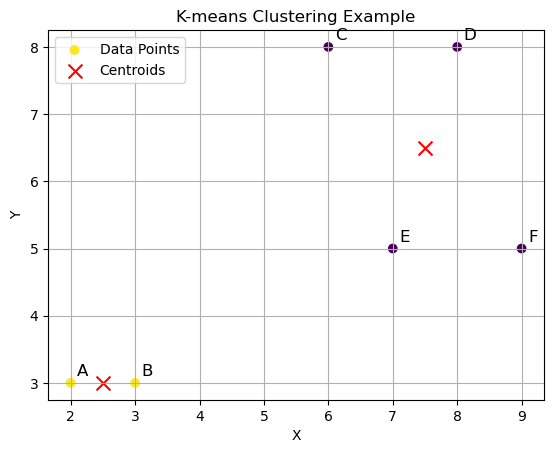

In [7]:
# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()




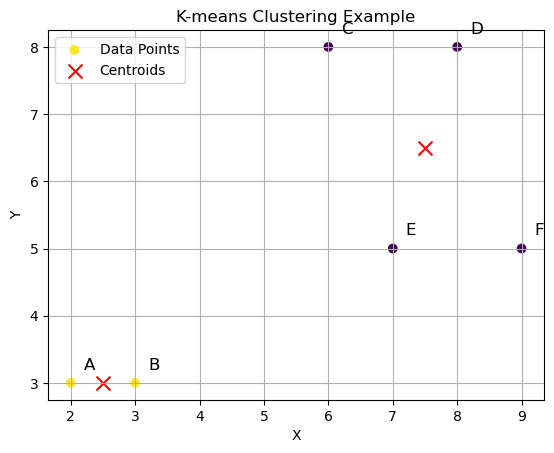

In [8]:
# Plot the data points and the centroids
scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
centroid_scatter = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
# Annotate points with a bit of offset to prevent overlap
for i, point in enumerate(data):
    plt.text(point[0] + 0.2, point[1] + 0.2, f'{chr(65+i)}', fontsize=12)

# Title, axis labels, and legend
plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')

# Show legend explicitly
plt.legend(handles=[scatter, centroid_scatter])
plt.grid(True)
plt.show()


**working with k-means dataset**

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [10]:
# Load the dataset
data = pd.read_csv(r'C:\Users\CVR\Downloads\kmeans_dataset_with_outliers.csv')



In [11]:
data.info()  # Overview of columns and data types
data.describe()  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Label   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


,X,Y
count,200.000000,200.000000
mean,2.968219,5.352789
std,10.296101,9.526229
min,-48.784553,-42.226536
25%,1.148088,2.196724
50%,3.103023,4.107638
75%,5.717363,6.891689
max,47.439481,49.296480


In [12]:
data.fillna(method='ffill', inplace=True)  # Fill missing values


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.select_dtypes(include='number'))


In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

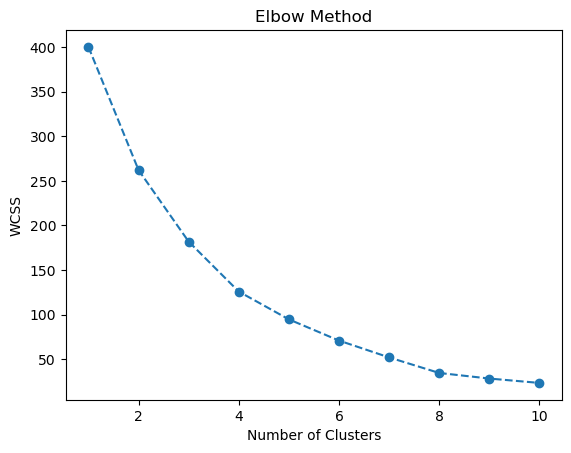

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
optimal_clusters = 3  # Replace with your elbow point
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
data['Cluster'] = labels


In [18]:
kmeans.cluster_centers_


array([[ 0.01132293, -0.15737945],
       [-2.7226017 ,  3.40685281],
       [ 4.22954466,  1.47418648]])

In [19]:
for i in range(optimal_clusters):
    print(data[data['Cluster'] == i])


             X          Y      Label  Cluster
0     1.248357   1.760413  Cluster 1        0
1     0.930868   1.907171  Cluster 1        0
2     1.323844   1.446833  Cluster 1        0
3     1.761515   1.401897  Cluster 1        0
4     0.882923   2.406263  Cluster 1        0
..         ...        ...        ...      ...
194  -4.434325  12.013260    Outlier        0
195 -22.261882 -31.187884    Outlier        0
196  -3.630160 -14.664777    Outlier        0
197   8.365611 -42.226536    Outlier        0
199  19.816171   3.609637    Outlier        0

[189 rows x 4 columns]
             X          Y    Label  Cluster
182 -21.428791  36.859913  Outlier        1
183 -27.640416  46.322254  Outlier        1
184 -48.784553  46.987883  Outlier        1
185 -45.684009  39.114311  Outlier        1
186   2.770111  49.296480  Outlier        1
187 -42.620344   5.385428  Outlier        1
191   8.431431  40.115801  Outlier        1
             X          Y    Label  Cluster
181  46.217255 -12.512942  O

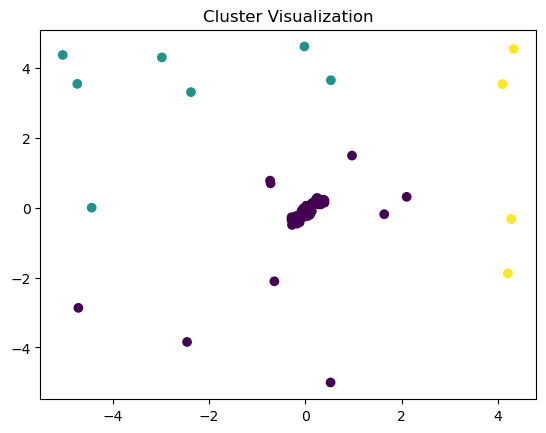

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.show()


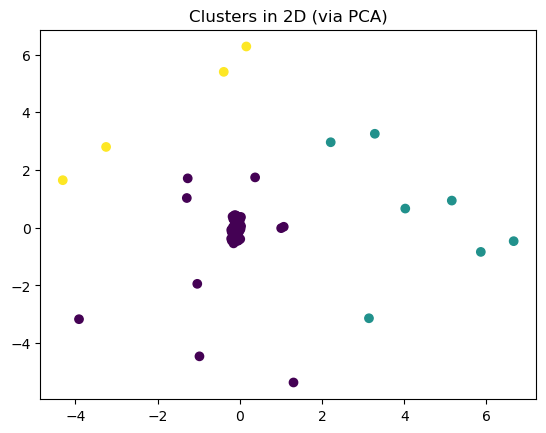

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clusters in 2D (via PCA)')
plt.show()


In [22]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.8519695598870546
